In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [2]:
# path = 'continuous_train.csv'
# data = pd.read_csv(path, sep = ',', na_filter = False)
data = pd.read_csv('datacontinuousstudents.csv', sep = ',', encoding = 'UTF-8')
datos = data.set_index('id')
X_train = datos.drop(columns = ['y']).copy()
y_train = data[['y']].copy()

In [3]:
# path = 'continuous_test.csv'
# test = pd.read_csv(path, sep = ',', na_filter = False)
# X_test = test.drop(columns = ['y']).copy()
# y_test = test[['y']].copy()

In [4]:
def calculated_metrics(variablesSelected,X_trained_scaled,y_train,X_test_scaled,y_test):
    X_trained_scaled_aux = X_trained_scaled[variablesSelected].copy()
    X_test_scaled_aux = X_test_scaled[variablesSelected].copy()
    ## Regresion para cada cantidad de variables
    regr = LinearRegression()

    # Train the model using the training sets
    regr.fit(X_trained_scaled_aux,  y_train['y'].values)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test_scaled_aux)

    y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=["y_pred"])

    total = y_pred.join(y_test)
    total['y_menor_-1'] = (total['y']<-1).astype(int)
    total['y_pred_menor_-1'] = (total['y_pred']<-1).astype(int)
    total['good_class'] = (total['y_menor_-1']==total['y_pred_menor_-1']).astype(int)
    mse = mean_squared_error(y_test, y_pred)
    accuray =total['good_class'].sum()/len(total)
    r2 = r2_score(y_test, y_pred)
    return mse,accuray,r2

In [5]:
modelToProof = [['x12','x23','x25','x32']]

In [6]:
modelToProof.append(['x6','x7','x12','x23','x24','x25','x32'])

In [7]:
modelToProof.append(['x6','x13','x20','x23','x25','x27','x31'])

In [8]:
modelToProof.append(['x6','x13','x21','x23','x25','x31'])

In [9]:
modelToProof.append(['x1','x23','x25','x32'])

In [10]:
modelToProof.append(['x1','x23','x25','x31'])

In [11]:
modelToProof.append(['x12','x23','x24','x25','x32'])

In [12]:
modelToProof.append(['x6','x7','x12','x23','x24','x25','x32'])

In [13]:
modelToProof.append(['x13','x23','x25','x31'])

In [14]:
modelToProof.append(['x13','x23','x25','x31','x32'])

In [15]:
modelToProof.append(['x23','x25','x31'])

In [16]:
modelToProof.append(['x13','x23','x25'])

In [17]:
modelToProof.append(['x1','x13','x23','x25','x31','x32'])

In [18]:
modelToProof.append(['x1','x13','x23','x25','x31'])

In [19]:
modelToProof.append(['x1','x13','x23','x25','x32'])

In [20]:
modelToProof.append(['x23','x25'])

In [21]:
modelToProof.append(['x6','x10','x13','x23','x31','x32','x25'])

In [22]:
resultados =  pd.DataFrame()
r2_total =  pd.DataFrame()
mse_total =  pd.DataFrame()
accuracy_total =  pd.DataFrame()
for variablesTorun in modelToProof:
    print(variablesTorun)
    mse = []
    accuray = []
    r2 = []
    if len(variablesTorun)>0:
        for j in range(1,1500):
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(X_train, y_train, test_size=0.2)
            standarscaler = StandardScaler()
            X_trained_scaled_aux = standarscaler.fit_transform(X_train_aux)
            X_trained_scaled_aux = pd.DataFrame(X_trained_scaled_aux, index=X_train_aux.index, columns=X_train.columns.values)

            X_test_scaled_aux = standarscaler.transform(X_test_aux)

            X_test_scaled_aux = pd.DataFrame(X_test_scaled_aux, index=X_test_aux.index, columns=X_test_aux.columns.values)


            variablesSelected = list(variablesTorun)
            mse_aux,accuray_aux,r2_aux= calculated_metrics(variablesSelected,X_trained_scaled_aux,y_train_aux,X_test_scaled_aux,y_test_aux)
            mse.append(mse_aux)
            accuray.append(accuray_aux)
            r2.append(r2_aux)

        auxRes= pd.DataFrame({'Modelo': [variablesTorun], 'Median: Mean squared error': [np.median(np.asarray(mse))], 'Median: R2': [np.median(np.asarray(r2))],'Median: Accuray': [np.median(np.asarray(accuray))]})
        resultados = pd.concat([resultados,auxRes])
        name = ','.join(variablesTorun)
        r2_total[name] = r2
        mse_total[name] = mse
        accuracy_total[name] = accuray
#         break
#         resultados.to_csv('ResultadosCV_scores.csv')
    else:
        print(f"El conjunto de variables {variablesTorun} no tiene variables")
#     break
# resultado_scores_ranking_cv.reset_index(inplace = True,drop = True)

['x12', 'x23', 'x25', 'x32']
['x6', 'x7', 'x12', 'x23', 'x24', 'x25', 'x32']
['x6', 'x13', 'x20', 'x23', 'x25', 'x27', 'x31']
['x6', 'x13', 'x21', 'x23', 'x25', 'x31']
['x1', 'x23', 'x25', 'x32']
['x1', 'x23', 'x25', 'x31']
['x12', 'x23', 'x24', 'x25', 'x32']
['x6', 'x7', 'x12', 'x23', 'x24', 'x25', 'x32']
['x13', 'x23', 'x25', 'x31']
['x13', 'x23', 'x25', 'x31', 'x32']
['x23', 'x25', 'x31']
['x13', 'x23', 'x25']
['x1', 'x13', 'x23', 'x25', 'x31', 'x32']
['x1', 'x13', 'x23', 'x25', 'x31']
['x1', 'x13', 'x23', 'x25', 'x32']
['x23', 'x25']
['x6', 'x10', 'x13', 'x23', 'x31', 'x32', 'x25']


In [23]:
resultados.sort_values('Median: Mean squared error')

,Median: Accuray,Median: Mean squared error,Median: R2,Modelo
0,0.733333,3.627139,0.187440,"[x6, x13, x20, x23, x25, x27, x31]"
0,0.733333,3.821605,0.148697,"[x13, x23, x25, x31]"
0,0.766667,3.864133,0.137674,"[x23, x25, x31]"
0,0.733333,3.866766,0.139760,"[x6, x13, x21, x23, x25, x31]"
0,0.766667,3.883025,0.133664,"[x6, x7, x12, x23, x24, x25, x32]"
0,0.733333,3.886829,0.161681,"[x1, x13, x23, x25, x32]"
0,0.766667,3.896324,0.143019,"[x12, x23, x24, x25, x32]"
0,0.766667,3.899064,0.135169,"[x1, x23, x25, x31]"
0,0.733333,3.907165,0.138464,"[x1, x13, x23, x25, x31]"
0,0.766667,3.913110,0.132662,"[x6, x7, x12, x23, x24, x25, x32]"


In [24]:
resultado_total = mse_total.describe().T

In [28]:
resultado_total.sort_values(['std','50%'])

,count,mean,std,min,25%,50%,75%,max
"x6,x13,x20,x23,x25,x27,x31",1499.0,3.665088,0.865391,1.421025,3.032724,3.627139,4.240776,6.743290
"x12,x23,x25,x32",1499.0,3.971498,0.896681,1.380762,3.366336,3.958305,4.545174,7.637993
"x6,x7,x12,x23,x24,x25,x32",1499.0,3.961707,0.898048,1.572612,3.326927,3.913110,4.569810,6.818387
"x1,x23,x25,x32",1499.0,3.945830,0.898690,1.561015,3.290732,3.949315,4.535964,6.948241
"x1,x13,x23,x25,x32",1499.0,3.927477,0.905806,1.396205,3.269884,3.886829,4.518001,7.351364
"x23,x25,x31",1499.0,3.921253,0.912511,1.533305,3.296159,3.864133,4.528504,6.790965
"x1,x13,x23,x25,x31,x32",1499.0,4.007908,0.913159,1.408088,3.386869,3.953612,4.578366,8.262418
"x13,x23,x25,x31",1499.0,3.884472,0.931268,1.480721,3.188588,3.821605,4.494953,6.721778
"x1,x13,x23,x25,x31",1499.0,3.940616,0.931491,1.384625,3.276956,3.907165,4.550646,7.248954
"x6,x13,x21,x23,x25,x31",1499.0,3.941572,0.942120,1.694936,3.268118,3.866766,4.534758,7.215191


In [29]:
accuracy_total_org = accuracy_total.describe().T

In [32]:
accuracy_total_org.sort_values(['std','50%'], ascending= [True, False])

,count,mean,std,min,25%,50%,75%,max
"x6,x7,x12,x23,x24,x25,x32",1499.0,0.763909,0.065055,0.566667,0.733333,0.766667,0.800000,0.933333
"x12,x23,x24,x25,x32",1499.0,0.776740,0.065511,0.533333,0.733333,0.766667,0.833333,0.966667
"x13,x23,x25",1499.0,0.764310,0.065920,0.566667,0.733333,0.766667,0.800000,0.966667
"x1,x23,x25,x32",1499.0,0.753836,0.067534,0.500000,0.700000,0.766667,0.800000,0.966667
"x12,x23,x25,x32",1499.0,0.757794,0.067807,0.533333,0.700000,0.766667,0.800000,0.966667
"x23,x25",1499.0,0.775339,0.069213,0.500000,0.733333,0.766667,0.833333,1.000000
"x1,x13,x23,x25,x31",1499.0,0.734445,0.070791,0.466667,0.700000,0.733333,0.766667,0.966667
"x1,x13,x23,x25,x32",1499.0,0.745964,0.071138,0.533333,0.700000,0.733333,0.800000,0.933333
"x1,x23,x25,x31",1499.0,0.756171,0.071152,0.500000,0.700000,0.766667,0.800000,0.933333
"x13,x23,x25,x31",1499.0,0.741761,0.071618,0.500000,0.700000,0.733333,0.800000,0.933333


<IPython.core.display.Javascript object>


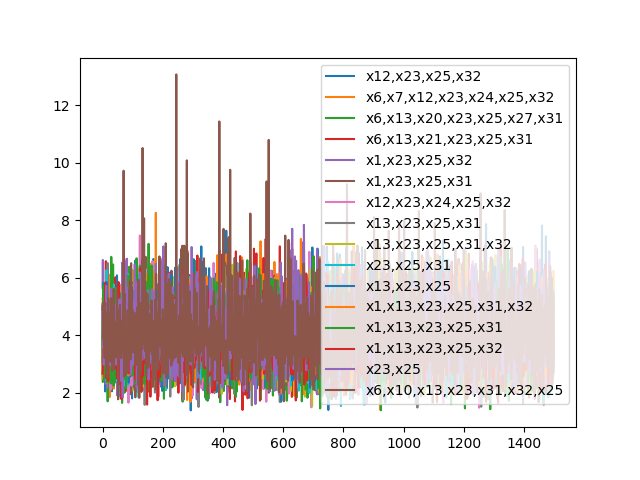

In [26]:
%matplotlib notebook
mse_total.plot()

<IPython.core.display.Javascript object>


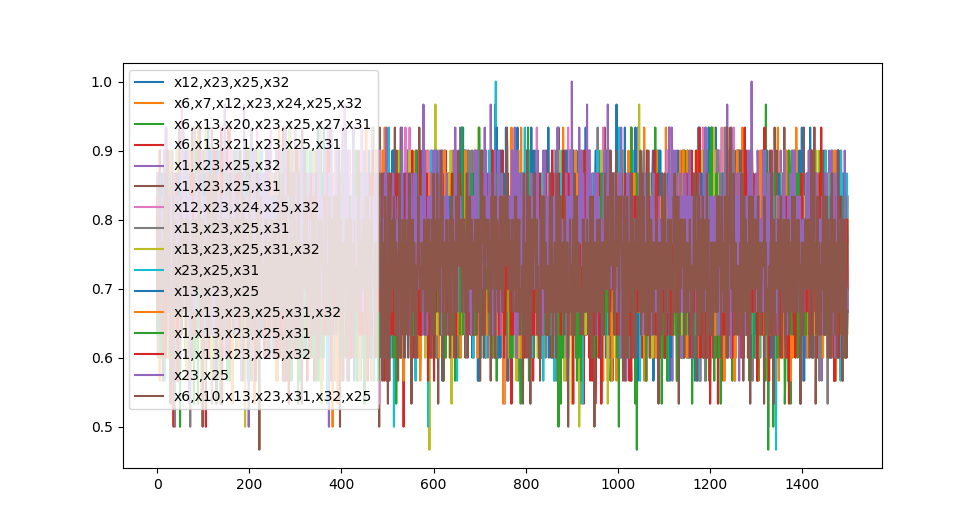

In [33]:
%matplotlib notebook
accuracy_total.plot()

## Otro Approach

In [ ]:
standarscaler = StandardScaler()
X_trained_scaled = standarscaler.fit_transform(X_train)
X_trained_scaled = pd.DataFrame(X_trained_scaled, index=X_train.index, columns=X_train.columns.values)

X_test_scaled = standarscaler.transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns.values)

In [ ]:
resultados = pd.DataFrame()
for variablesSelected in modelToProof:
    mse_aux,accuray_aux,r2_aux= calculated_metrics(variablesSelected,X_trained_scaled,y_train,X_test_scaled,y_test)
    auxRes= pd.DataFrame({'Modelo': [variablesSelected], 'Median: Mean squared error': [np.median(np.asarray(mse_aux))], 'Median: R2': [np.median(np.asarray(r2_aux))],'Median: Accuray': [np.median(np.asarray(accuray_aux))]})
    resultados = pd.concat([resultados,auxRes])

In [ ]:
resultados.sort_values('Median: Mean squared error')

In [ ]:
def training_model(variablesSelected,X_trained,y_train,X_test,y_test):
    X_trained_aux = X_trained[variablesSelected].copy()
    X_test_aux = X_test[variablesSelected].copy()
    ## Regresion para cada cantidad de variables
    model_to_return = {}
    model_to_return['variableSelected'] = variablesSelected
    
    pipeline = Pipeline(steps = [('standarscaled',StandardScaler()),
                                 ('linearModel',LinearRegression())])


    # Train the model using the training sets
    pipeline.fit(X_trained_aux,  y_train['y'].values)

    # Make predictions using the testing set
    y_pred = pipeline.predict(X_test_aux)

    y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=["y_pred"])

    total = y_pred.join(y_test)
    total['y_menor_-1'] = (total['y']<-1).astype(int)
    total['y_pred_menor_-1'] = (total['y_pred']<-1).astype(int)
    total['good_class'] = (total['y_menor_-1']==total['y_pred_menor_-1']).astype(int)
    error = total['y']-total['y_pred']
    mse = mean_squared_error(y_test, y_pred)
    accuray =total['good_class'].sum()/len(total)
    r2 = r2_score(y_test, y_pred)
    model_to_return['model'] = pipeline
    model_to_return['mse_test'] = mse
    model_to_return['accuray_test'] = accuray
    model_to_return['r2_test'] = r2
    return model_to_return,error

## Modelo Final

In [ ]:
variablesSelected = ['x23', 'x25']

In [ ]:
model_to_return,error = training_model(variablesSelected,X_train,y_train,X_test,y_test)

In [ ]:
type(error)

In [ ]:
error.hist()

In [ ]:
from scipy import stats

stats.shapiro(error)

In [ ]:
model_to_return

In [ ]:
pickle.dump(model_to_return, open('modelContinuos.sav', 'wb'))